In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("house_data.csv")
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [7]:
# since House price values are displayed in scientific notation by pandas due to large numeric values converting it into integers
df['House_Price'] = df['House_Price'].astype(int)
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
0,1360,2,1,1981,0.60,0,5,262382,43
1,4272,3,3,2016,4.75,1,6,985260,8
2,3592,1,2,2016,3.63,0,9,777977,8
3,966,1,2,1977,2.73,1,8,229698,47
4,4926,2,1,1993,4.70,0,8,1041740,31


In [8]:
# Creating a new column to store the age of the house
df['House_Age'] = 2024 - df['Year_Built']
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
0,1360,2,1,1981,0.60,0,5,262382,43
1,4272,3,3,2016,4.75,1,6,985260,8
2,3592,1,2,2016,3.63,0,9,777977,8
3,966,1,2,1977,2.73,1,8,229698,47
4,4926,2,1,1993,4.70,0,8,1041740,31


In [9]:
# since we have created house_age..deleting year_built
df.drop('Year_Built', axis=1, inplace=True)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
0,1360,2,1,0.60,0,5,262382,43
1,4272,3,3,4.75,1,6,985260,8
2,3592,1,2,3.63,0,9,777977,8
3,966,1,2,2.73,1,8,229698,47
4,4926,2,1,4.70,0,8,1041740,31


In [11]:
df.info() # Checking data_structures and data_types 
df.describe() # Getting statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Lot_Size              1000 non-null   float64
 4   Garage_Size           1000 non-null   int64  
 5   Neighborhood_Quality  1000 non-null   int64  
 6   House_Price           1000 non-null   int64  
 7   House_Age             1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2815.42,2.99,1.97,2.78,1.02,5.62,618860.54,37.45
std,1255.51,1.43,0.82,1.30,0.81,2.89,253568.06,20.63
min,503.00,1.00,1.00,0.51,0.00,1.00,111626.00,2.00
25%,1749.50,2.00,1.00,1.67,0.00,3.00,401647.75,19.75
50%,2862.50,3.00,2.00,2.81,1.00,6.00,628266.50,38.00
75%,3849.50,4.00,3.00,3.92,2.00,8.00,827140.75,55.00
max,4999.00,5.00,3.00,4.99,2.00,10.00,1108236.00,74.00


### Distribution of House Prices
This histogram shows how house prices are distributed in the dataset.  
Most house prices fall within a common range, indicating a balanced dataset with no extreme outliers.


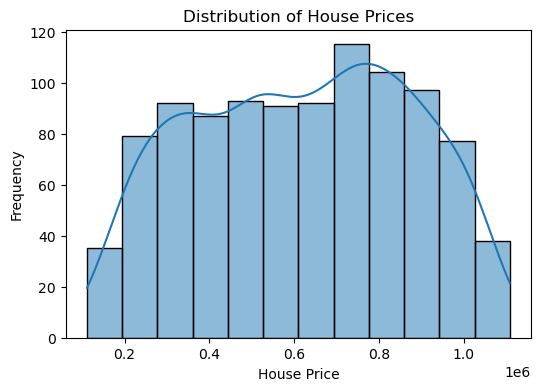

In [20]:
# Distribution of house prices
plt.figure(figsize=(6,4))
sns.histplot(df['House_Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()


### Correlation Heatmap
The heatmap visualizes the correlation between different house features and the target variable.  
Square footage shows the strongest correlation with house price.


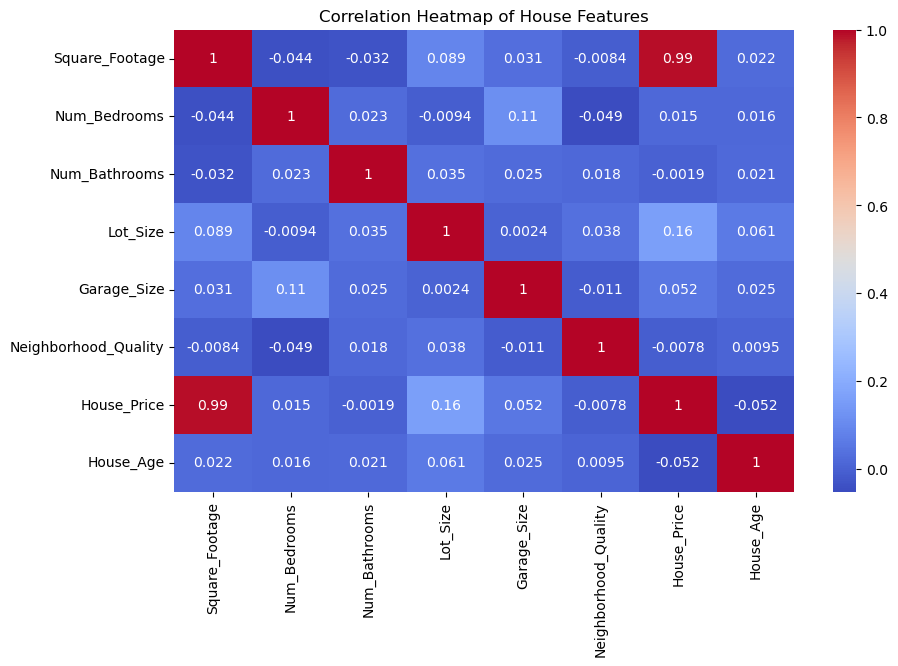

In [25]:
# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of House Features")
plt.show()


In [26]:
# Separate input features (X) and target variable (y)
X = df.drop('House_Price', axis=1)
y = df['House_Price']

X.head(), y.head()


(   Square_Footage  Num_Bedrooms  Num_Bathrooms  Lot_Size  Garage_Size  \
 0            1360             2              1      0.60            0   
 1            4272             3              3      4.75            1   
 2            3592             1              2      3.63            0   
 3             966             1              2      2.73            1   
 4            4926             2              1      4.70            0   
 
    Neighborhood_Quality  House_Age  
 0                     5         43  
 1                     6          8  
 2                     9          8  
 3                     8         47  
 4                     8         31  ,
 0     262382
 1     985260
 2     777977
 3     229698
 4    1041740
 Name: House_Price, dtype: int64)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the split data
X_train.shape, X_test.shape


((800, 7), (200, 7))

In [15]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)


LinearRegression()

### Feature Importance from Linear Regression
This bar chart represents the contribution of each feature to house price prediction.  
Features with higher coefficient values have a greater influence on the predicted price.


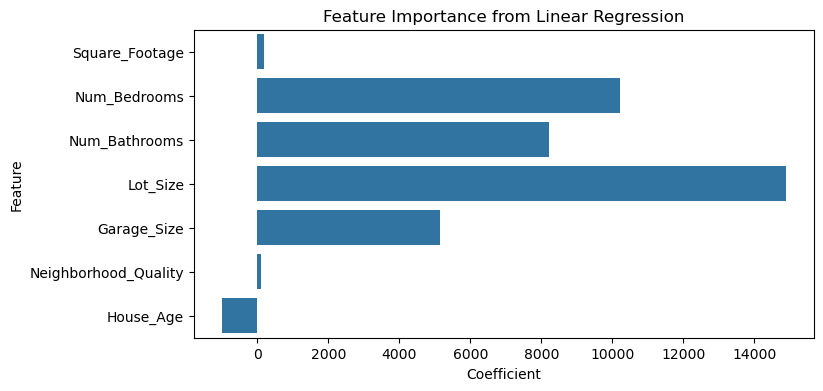

In [23]:
# Visualizing feature importance using model coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Importance from Linear Regression")
plt.show()


In [16]:
# Predict house prices for the test dataset
y_pred = model.predict(X_test)

# Display first 5 predicted values
y_pred[:5]


array([ 868686.61374417,  490337.38839047,  945666.64944163,
       1033402.41310226,  776698.30948747])

In [27]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 8174.594316144182
Root Mean Squared Error (RMSE): 10071.496455132503
R2 Score: 0.9984263595495338


### Actual vs Predicted House Prices
This scatter plot compares actual house prices with predicted prices.  
The closer the points are to the diagonal line, the better the model's performance.


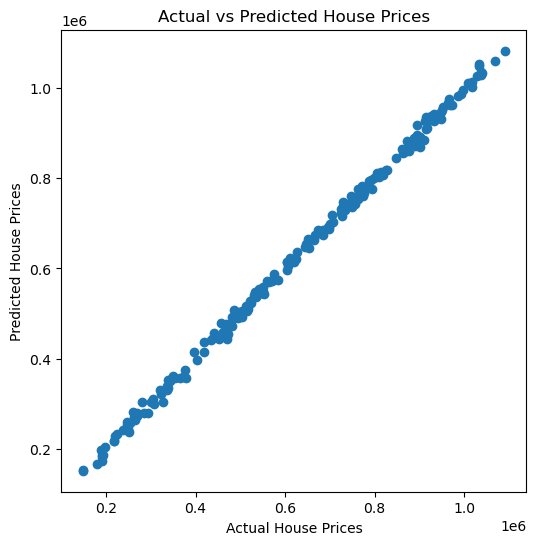

In [18]:
# Plot Actual vs Predicted house prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [19]:
# Predict price for a custom house
custom_house = np.array([[2500, 4, 3, 0.6, 2, 8, 10]])
predicted_price = model.predict(custom_house)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 574869.2534662652


D:\ anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
